<a href="https://colab.research.google.com/github/lukebene/Codigos-Treinos/blob/master/postcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# loading needed methods
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [0]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/df.csv')

df.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,Detectado
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [0]:
df.duplicated().sum()



0

In [0]:
df.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,Detectado
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [0]:
df.query('Fraude==1 and Detectado==1')

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,Detectado
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [0]:
data_teste =  df.Detectado.value_counts()
data_teste

0    6362604
1         16
Name: Detectado, dtype: int64

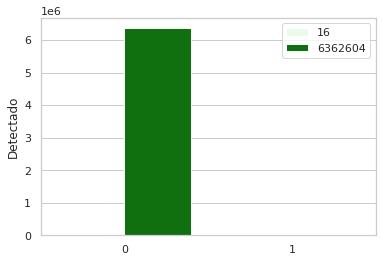

In [0]:
import seaborn as sns

sns.set(style="whitegrid")

ax = sns.barplot(x=,y=data_teste,hue=data_teste.values,color='green')



In [0]:
data_teste = df.Tipo.value_counts()

Text(0.5, 0, 'Tipos')

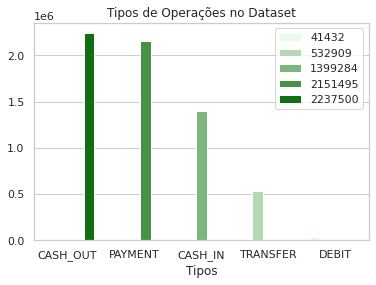

In [0]:
ax = sns.barplot(x=data_teste.index,y=data_teste.values,hue=data_teste.values,color='green')
plt.title("Tipos de Operações no Dataset")
plt.xlabel("Tipos")


In [0]:
df = df.drop('Detectado',1)

df.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [0]:
dados = df.copy() #criar uma copia do dataset para nao fazer alterações no original.

dados['Tipo2'] = np.nan

#preenchendo a coluna Tipo2 com a informação, C para cliente e E para empresa.
dados.loc[df.Origem.str.contains('C') & df.Destino.str.contains('C'),"Tipo2"] = "CC" 
dados.loc[df.Origem.str.contains('C') & df.Destino.str.contains('M'),"Tipo2"] = "CE"
dados.loc[df.Origem.str.contains('M') & df.Destino.str.contains('C'),"Tipo2"] = "EC" 
dados.loc[df.Origem.str.contains('M') & df.Destino.str.contains('M'),"Tipo2"] = "EE" 

dados.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude,Detectado,Tipo2
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,CE
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,CE
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,CC
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,CE


In [0]:
fraude = dados.query('Fraude==1')
valido = dados.query('Fraude==0')

fraude.shape
valido.shape


(6354407, 12)

In [0]:
print('As transações bancarias que foram fraudadas foram: \n',fraude.Tipo.value_counts())

print('\nAs transações fraudulentas ocorreram em negociações: \n',fraude.Tipo2.value_counts())

As transações bancarias que foram fraudadas foram: 
 CASH_OUT    4116
TRANSFER    4097
Name: Tipo, dtype: int64

As transações fraudulentas ocorreram em negociações: 
 CC    8213
Name: Tipo2, dtype: int64


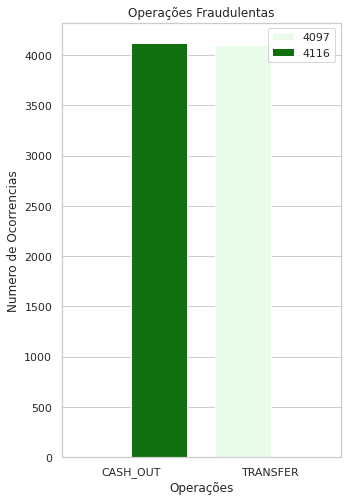

In [0]:
data_teste = fraude.Tipo.value_counts()
plt.figure(figsize=(5,8))
ax = sns.barplot(x=data_teste.index,y=data_teste.values,hue=data_teste.values,color='green')
plt.title("Operações Fraudulentas")
plt.xlabel("Operações")
plt.ylabel("Numero de Ocorrencias")
plt.show()

In [0]:
dados.Tipo2.value_counts()

CC    4211125
CE    2151495
Name: Tipo2, dtype: int64

In [0]:
data = dados.query('Tipo2=="CC"')
data.head()

saldo_errado = (data["SaldoOrigemVelho"] - data["Valor"] != data["SaldoOrigemNovo"]) | (data["SaldoDestinoVelho"] + data["Valor"] != data["SaldoDestinoNovo"])
print("Porcentagem de observações em operações entre clientes com erros: ", 100*round(sum(saldo_errado)/len(data),2))

Porcentagem de observações em operações entre clientes com erros:  97.0


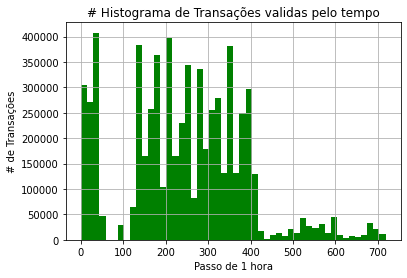

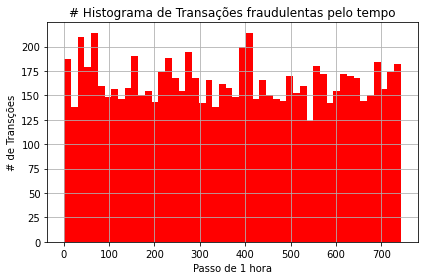

In [0]:
fraude = dados.query('Fraude==1')
valido = dados.query('Fraude==0')
bins = 50

valido.hist(column="Passo",color="green",bins=bins)
plt.xlabel("Passo de 1 hora")
plt.ylabel("# de Transações")
plt.title("# Histograma de Transações validas pelo tempo")

fraude.hist(column ="Passo",color="red",bins=bins)
plt.xlabel("Passo de 1 hora")
plt.ylabel("# de Transções")
plt.title("# Histograma de Transações fraudulentas pelo tempo")

plt.tight_layout()
plt.show()

In [0]:
#pegar a variavel Passo e transformar em dias e por faixas de horas
n_dias = 7
n_horas = 24
dias_fraude = fraude.Passo % n_dias
horas_fraude = fraude.Passo % n_horas
dias_valido = valido.Passo % n_dias
horas_valido = valido.Passo % n_horas

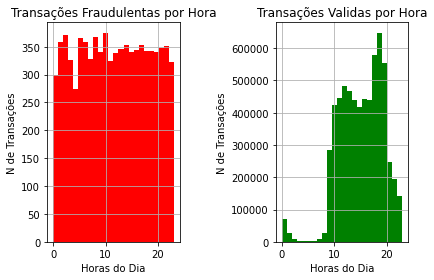

In [0]:
plt.subplot(1, 2, 1)
horas_fraude.hist(bins=n_horas,color="red")
plt.title('Transações Fraudulentas por Hora')
plt.xlabel('Horas do Dia')
plt.ylabel("N de Transações")

plt.subplot(1,2,2)
horas_valido.hist(bins=n_horas,color="green")
plt.title('Transações Validas por Hora')
plt.xlabel('Horas do Dia')
plt.ylabel("N de Transações")

plt.tight_layout()
plt.show()


In [0]:
dados = dados.drop('Tipo2',axis=1)

dados.head()

,Passo,Tipo,Valor,Origem,SaldoOrigemVelho,SaldoOrigemNovo,Destino,SaldoDestinoVelho,SaldoDestinoNovo,Fraude
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [0]:
dados= dados[(dados["Tipo"] == "CASH_OUT") | (dados["Tipo"] == "TRANSFER")]


dados.shape

(2770409, 10)

In [0]:
dados = pd.get_dummies(dados,prefix='Tipo')
dados.head()